In [1]:
import pandas as pd
import sys

sys.path.append("bpp3d/src/")
import bpp3d.src.main as main

In [19]:
products = pd.read_csv('ProductInfo.csv')
# Fillig Nan on Horizontal and vertical limits with a big number
products['vertical_stacking_limit'] = products['vertical_stacking_limit'].fillna(100)
products['horizontal_stacking_limit'] = products['horizontal_stacking_limit'].fillna(100)
products.to_pickle('products.pkl')
products.head()

,division_name,product_name,product_model,carton_number,component_name,weight,height,width,depth,vertical_stacking_limit,horizontal_stacking_limit
0,Godrej Security Solutions,Home Locker,20L,1/1,NaN,11.0,250,350,320,4.0,100.0
1,Godrej Security Solutions,Home Locker,40L,1/1,NaN,16.0,420,350,350,4.0,100.0
2,Godrej Security Solutions,Rhino,45L,1/1,NaN,37.0,425,460,410,2.0,100.0
3,Godrej Security Solutions,Fire Resistant Safe,40L,1/1,NaN,61.0,545,415,435,2.0,100.0
4,Godrej Security Solutions,Ritz,28L,1/1,NaN,22.0,330,400,335,3.0,100.0


In [3]:
# Convert vehicle dimensions from ft to mm
trucks = pd.read_csv('TruckDimensions.csv')
trucks['tonnage'] = trucks['tonnage'].apply(lambda x: round(float(x.split(' ')[0]), 2) )
trucks['depth'] = round(trucks['depth'] * 1000 / 3.281, 1)
trucks['height'] = round(trucks['height'] * 1000 / 3.281, 1)
trucks['width'] = round(trucks['width'] * 1000 / 3.281, 1)
trucks

truck_analysis = trucks.copy()
truck_analysis['volume'] = truck_analysis['depth'] * truck_analysis['width'] * truck_analysis['height']
truck_analysis['giga volume (mm3) / tonnage'] = truck_analysis['volume'] * 1e-9 / truck_analysis['tonnage']
truck_analysis

,vehicle_type,depth,width,height,tonnage,volume,giga volume (mm3) / tonnage
0,407 TEMPO,2986.9,1950.6,2133.5,2.5,1.243030e+10,4.972119
1,14 FT LPT TEMPO,4145.1,2103.0,2285.9,4.0,1.992652e+10,4.981631
2,18 Feet Truck,5516.6,2224.9,2285.9,9.0,2.805687e+10,3.117430
3,19 Feet Truck,5821.4,2224.9,2499.2,7.0,3.236972e+10,4.624246
4,20 Feet Container,6065.2,2468.8,2499.2,7.0,3.742244e+10,5.346062
5,22 Feet Container,6705.3,2285.9,2285.9,7.0,3.503746e+10,5.005352
6,24 Feet Container,7223.4,2377.3,2468.8,7.0,4.239470e+10,6.056386
7,22-24 Feet Taurus Truck,7436.8,2285.9,2103.0,15.0,3.575054e+10,2.383369
8,28 Feet Taurus Truck,8594.9,2285.9,2224.9,20.0,4.371279e+10,2.185640
9,32 Feet Container,9753.1,2529.7,2743.1,7.0,6.767891e+10,9.668415


In [15]:
order = products
cg_bin_pool = main.main(
    order,
    procedure="cg",
    max_iters=1,
    superitems_horizontal=True,
    superitems_horizontal_type="two-width",
    tlim=10,
    superitems_max_vstacked=2 + int(order['vertical_stacking_limit'].min()),
    cg_use_height_groups=False,
    cg_mr_warm_start=False,
    cg_max_iters=100,
    cg_max_stag_iters=10,
    cg_sp_mr=True,
    cg_sp_np_type="mip",
    cg_sp_p_type="mr",
    cg_return_only_last=False,
)
cg_bin_pool.get_original_layer_pool().to_dataframe()

2022-01-10 01:22:55.635 | INFO     | bpp3d.src.main:main:169 - CG procedure starting
2022-01-10 01:22:55.638 | INFO     | bpp3d.src.main:main:179 - CG iteration 1/1
2022-01-10 01:22:55.650 | DEBUG    | superitems:_gen_single_items_superitems:639 - Generated 37 superitems with a single item
2022-01-10 01:22:55.651 | INFO     | superitems:gen_superitems:623 - Generating horizontal superitems of type 'two-width'
2022-01-10 01:22:55.652 | DEBUG    | superitems:_gen_superitems_horizontal:685 - Generated 2 horizontal superitems with 2 items
2022-01-10 01:22:55.655 | DEBUG    | superitems:_gen_superitems_horizontal:692 - Generated 0 horizontal superitems with 4 items
2022-01-10 01:22:55.660 | INFO     | superitems:gen_superitems:626 - Generating vertical superitems with maximum stacking of 2
2022-01-10 01:22:55.662 | DEBUG    | superitems:_gen_superitems_vertical:770 - Generated 11 wide vertical superitems
2022-01-10 01:22:55.663 | DEBUG    | superitems:_gen_superitems_vertical:772 - Generate

,item,x,y,z,width,depth,height,layer
0,34,0,0,0,2050,955,60,0
1,33,0,0,0,2070,920,55,1
2,6,10,17,0,576,671,1410,2
3,8,0,0,1410,597,706,1440,2
4,5,597,22,0,576,623,1180,2
5,7,597,0,1180,577,667,1480,2
6,26,597,667,0,520,105,2155,2
7,28,0,706,0,540,135,2155,2
8,25,1174,0,0,1019,543,1982,2
9,27,0,841,0,485,50,1835,2


In [16]:
cg_bin_pool.get_original_layer_pool().describe()

,layer,height,area,volume,2d_density,3d_density
0,0,60.0,1957750.0,1.174650e+08,0.783100,0.783100
1,1,55.0,1904400.0,1.047420e+08,0.761760,0.761760
2,2,2850.0,2026683.0,3.969449e+09,0.810673,0.557116
3,3,859.0,1263780.0,1.085587e+09,0.505512,0.505512
4,4,45.0,1909850.0,8.594325e+07,0.763940,0.763940
5,5,125.0,1081600.0,1.352000e+08,0.432640,0.432640
6,6,125.0,1111500.0,1.389375e+08,0.444600,0.444600
7,7,859.0,1976131.0,1.317651e+09,0.790452,0.613574
8,8,985.0,1434086.0,1.381020e+09,0.573634,0.560820
9,9,1760.0,1275012.0,1.492353e+09,0.510005,0.339171


[<Axes3DSubplot:xlabel='x', ylabel='y'>,
 <Axes3DSubplot:xlabel='x', ylabel='y'>,
 <Axes3DSubplot:xlabel='x', ylabel='y'>]

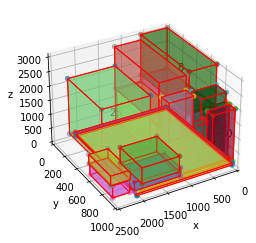

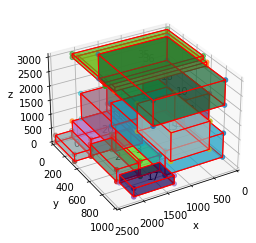

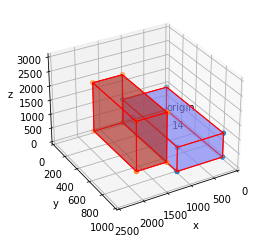

In [18]:
cg_bin_pool.plot()